<a href="https://colab.research.google.com/github/engogola/end-to-end-heart-Diesease-classification-using-ML/blob/main/End_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#predicting heart diesease using machine learning
This notebook looks into using various python-based machine learning and data science libraries to attempt tobuild a model capable of predicting capable of predicting whether or not someone has a heart diesease based on thier medical attributes.

We are going to take the following approach
1. problem definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation
## 1.Problem Definition
>Given clinical parameters about a patient,we can predict whether or not they have a heart diesseas?
## 2.Data
The data came from kaggle .https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
##3.Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart diesease during the proof of concept,we will pursuethe project.
##4. Features
This is where you will get different information about each of the features in your data.
**create a data dictionary**
1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
8.exercise induced angina
9.oldpeak = ST depression induced by exercise relative to rest
10.the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
11.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
12.The names and social security numbers of the patients were recently removed from the database, replaced with
dummy values.

LOAD DATA

In [ ]:
#import all the tools we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#models fromScikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
import pandas as pd
df =pd.read_csv('/content/archive (1).zip')
df.shape #(rows, columns)
df.head()
#Exploratory data
df["target"].value_counts() .plot(kind="bar",color=["red", "lightgreen"])
df.info()
#Are there any missing values?
df.isna().sum()
df.describe()



Heart Disease Frequency according to sex


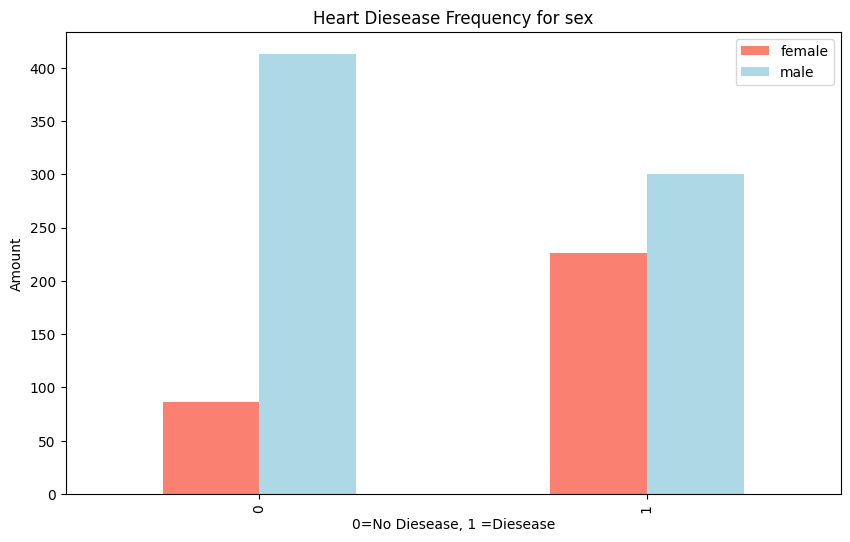

In [ ]:
df.sex.value_counts()
#compare target column with sex column
pd.crosstab(df.target,df.sex)

#creating a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
import matplotlib.pyplot as plt
plt.title("Heart Diesease Frequency for sex")
plt.xlabel("0=No Diesease, 1 =Diesease")
plt.ylabel("Amount")
plt.legend(["female","male"]);


Age vs Max Heart Rate for Heart Diesease

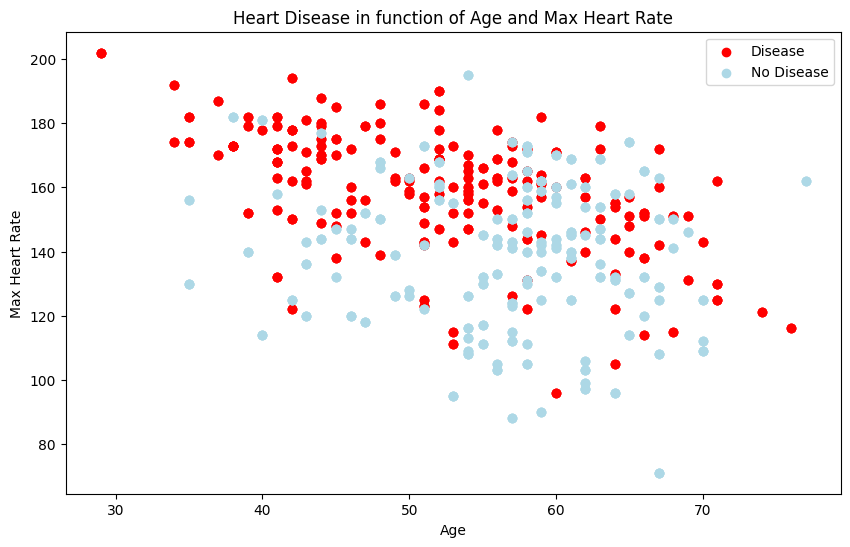

In [ ]:
#create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],c="red")

#scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


In [ ]:
# Make a correlation matrix
df.corr()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Modelling

In [ ]:
df.head()

In [ ]:
# split data into X and Y
X = df.drop("target", axis=1)

y = df["target"]

In [ ]:
X

In [ ]:
y

In [ ]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split data into train and test sets
import numpy as np

np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

we are going to try 3 different machine learning models

1.   Logistic Regression
2.   K-Nearest Classifier

3. Random Forest Classifier





In [ ]:
!pip install sklearn

In [ ]:
# Check if there is a variable or function called "LogisticRegression"
import sys
if "LogisticRegression" in sys.modules:
    print("Warning: The variable or function 'LogisticRegression' is already defined.")

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


NameError: name 'LogisticRegression' is not defined

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

Modell comparison


Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

Hypyterparameter tuning
Feature importance
Confusion matrix
Cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)



In [ ]:

# Create the DataFrame
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Hyperparameter Tuning

In [ ]:
# Let's tune KNN
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Setup KNN instance
knn = KNeighborsClassifier()

# Rest of the code remains unchanged

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**Hyperparameter Tuning using RandomizedsearchCV**

1.LogisticRegression()
2.RandomForestClassifier()
... using RandomizedSearcv



In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hypeparameter grid setup for each of our models ,let's tune them using RandomizedsearchCV

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test, y_test)

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...



In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

hyperparameter Tuning using GridsearchCV

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [ ]:
# Check the best hyperparmaters
gs_log_reg.best_params_

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

Evaluate our Tuned Mchine learning classiifier ,beyond accuracy


*  ROC curve and AUC score
*   confusion matrix

*  classification report  



*   Precision
*   Recall






*  F1-score



In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

**Calculate evaluation metrics using cross validation**
We are going to calculate accuracy ,precision,recall and f1-score of our model

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_


In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision


In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);


Save A model

In [ ]:
# Import the pickle library
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)